In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy

mapping = pd.read_csv('../sample_data/trial_6/mapping.csv')
edges = pd.read_csv('../sample_data/trial_6/edges.csv')

g = nx.from_pandas_edgelist(
    edges, 
    source="src", 
    target="dst",
    edge_attr="weight",
    create_using=nx.DiGraph
)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 2183
Number of edges: 54539
Average in degree:  24.9835
Average out degree:  24.9835


/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


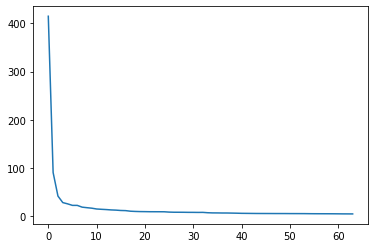

In [25]:
L = nx.laplacian_matrix(nx.Graph(g))
k = 64
w, v = scipy.sparse.linalg.eigs(L, k=k)
plt.plot(np.arange(k), w[:k])

In [27]:
subgraph_sizes = [8, 16, 32, 64, 128, 256]
subgraphs = [g.subgraph(mapping.id[:k]) for k in subgraph_sizes]
print(subgraph_sizes)

[8, 16, 32, 64, 128, 256]


/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


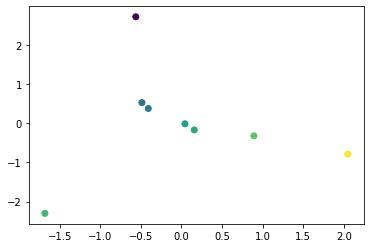

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


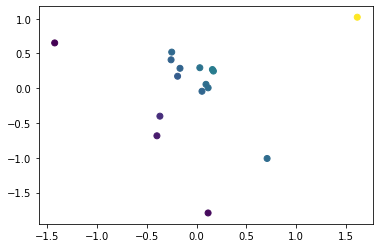

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


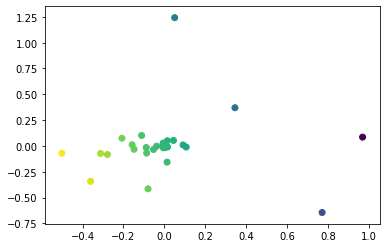

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


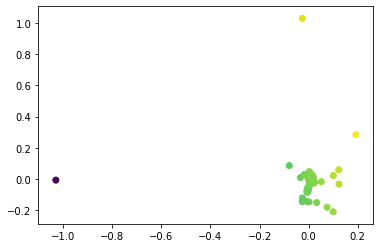

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


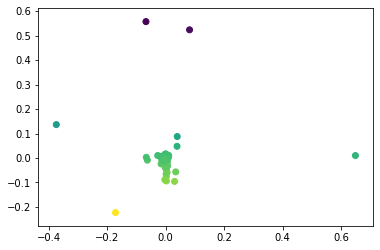

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


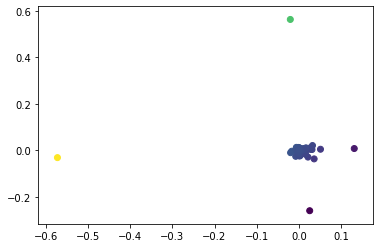

In [30]:
def laplacian_embedding(g, dim):
    L = nx.laplacian_matrix(g)
    w, v = scipy.sparse.linalg.eigs(L, k=dim+1)
    return np.divide(v[:, 1:], np.sqrt(w[1:]))

for gs in subgraphs:
    l_emb = laplacian_embedding(nx.Graph(gs), 2)
    plt.clf()
    plt.scatter(l_emb.T[0], l_emb.T[1], c=l_emb.dot(l_emb[0]))
    plt.show()

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 432x288 with 0 Axes>

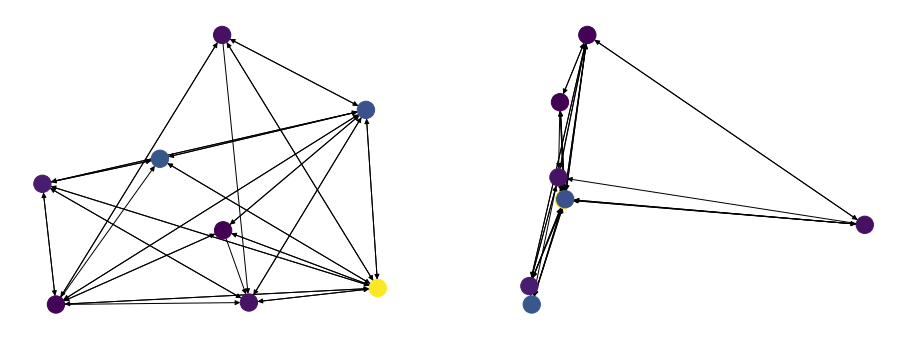

<Figure size 432x288 with 0 Axes>

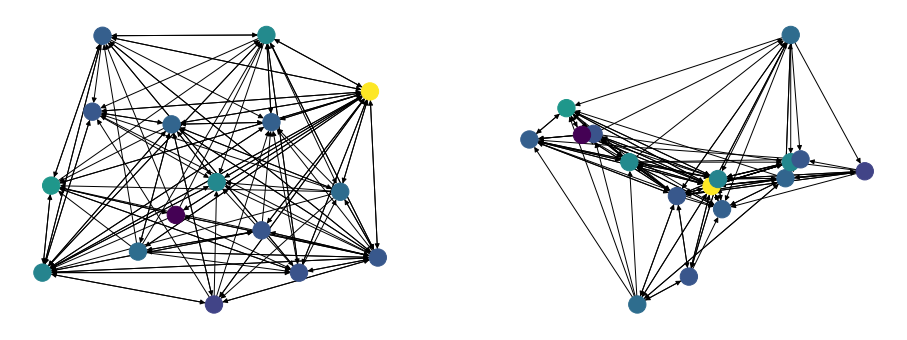

<Figure size 432x288 with 0 Axes>

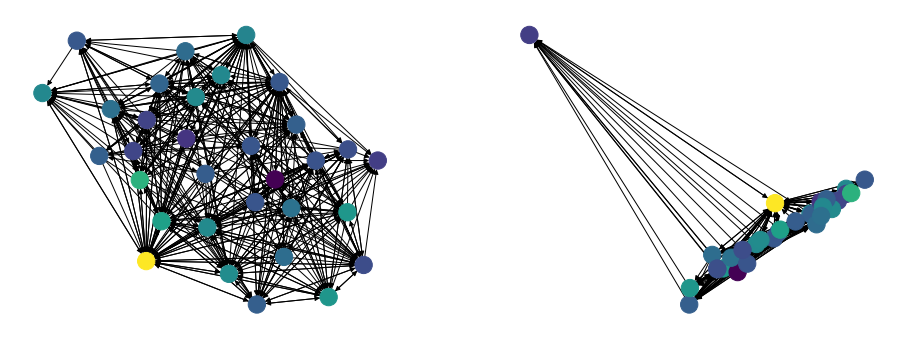

<Figure size 432x288 with 0 Axes>

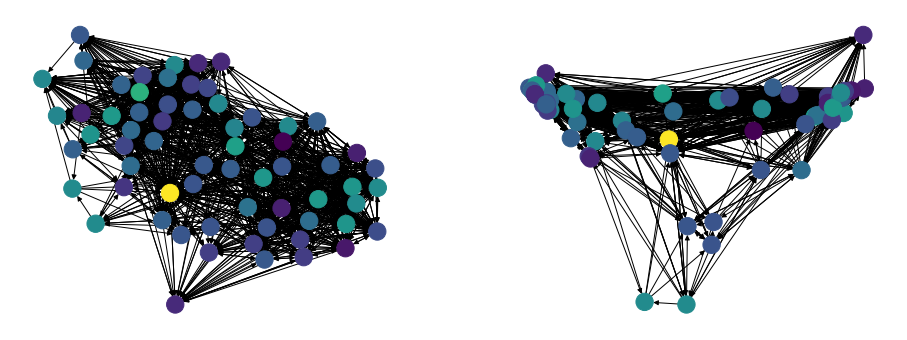

<Figure size 432x288 with 0 Axes>

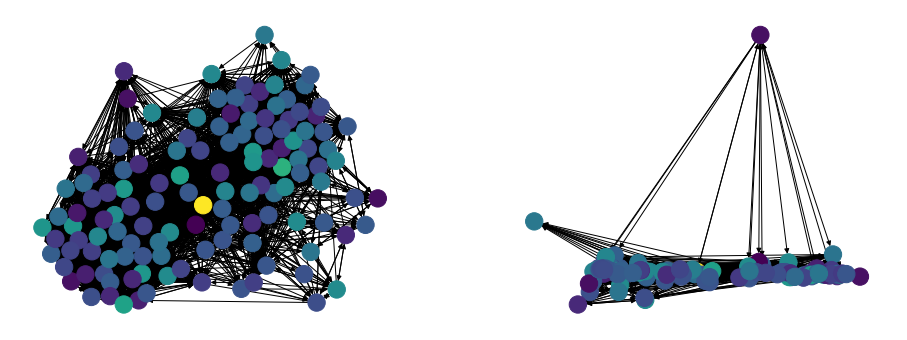

<Figure size 432x288 with 0 Axes>

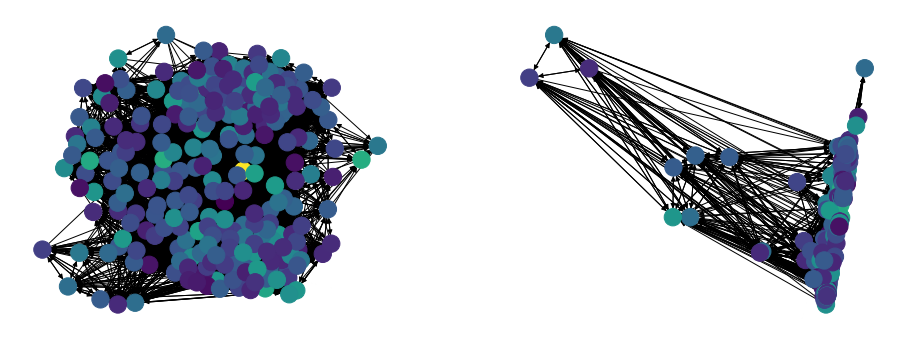

In [23]:
l_emb = laplacian_embedding(nx.Graph(g), 64)
sim = l_emb.dot(l_emb[0])

def draw(g):
    plt.clf()
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    nodes = mapping.id[:g.order()].tolist()
    colors = np.log(sim[:len(nodes)])
    nx.draw(g, nodelist=nodes, node_color=colors)
    plt.subplot(122)
    nx.draw_spectral(g, nodelist=nodes, node_color=colors)
    plt.show()

for gs in subgraphs:
    draw(gs)